created by: Dora Szabo https://github.com/szaboodoora

We will work on a currently open (as of Oct 2019) comptetion launched by drivendata.
This is an intermediate-level practice competition. Your task is to predict the number of dengue cases each week (in each location) based on environmental variables describing changes in temperature, precipitation, vegetation, and more.

You can read about the problem and data description in detail here:

http://drivendata.co/blog/dengue-benchmark/

https://www.drivendata.org/competitions/44/

## This notebook will give you errors if you try to run it without doing the marked exercises. We will make the notebook including the solutions of these exercises available after the workshop.

In [ ]:
#Before anything else, we import a few general data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we read in the data files and investigate their shape.
Features stand for input/independent variables, while labels correspond the output/dependent variables.

In [ ]:
adf=pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/sample_files/master/dengue_features_train.csv")  #The features for the training dataset.
adf1=pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/sample_files/master/dengue_features_test.csv") #The features for the test dataset.
adf2=pd.read_csv( "https://raw.githubusercontent.com/budapestpy-workshops/sample_files/master/dengue_labels_train.csv") #The labels/solutions for the training dataset
print("Shape of dengue_features_train: {}".format(adf.shape))
print("Shape of dengue_features_test: {}".format(adf1.shape))
print("Shape of dengue_labels_train: {}".format(adf2.shape))


## Exercise 1

Figure out how many records do we have for the two cities separetely and what their the range in regard to the dates and their index!

We have training data for San Juan from: "start date" (index no) till "end date" (index no)
(total no of rows:)

We have test data for San Juan from: "start date" (index no) till "end date" (index no)
(total no of rows:)

We have training data for Iquitos from: "start date" (index no) till "end date" (index no)
(total no of rows:)

We have test data for Iquitos from: "start date" (index no) till "end date" (index no)
(total no of rows:)


Let's have a look at the data
(description of the features here: https://www.drivendata.org/competitions/44/page/82/)

In [ ]:
adf.head()

In [ ]:
adf2.head()

## Exercise 2 Let's combine the two feature datasets before we modify anything in it!
Then, investigate what type of features we have.
## Q: Is everything in the correct format?

Let's change its type to the correct format and double check that we indeed modified it!

To make use of the fact that this is a time-series data, let's calculate some features based on past values. 
## Q: How can you calculate such features?

To make it simpler, I calculate these at the same time with a for loop

Next, we will deal with the missing values in a very simple way.


## Homework:
1. What could be a better way to deal with missing values? (this step can improve your submission score)
2. Try out imputer to deal with missing values instead https://scikit-learn.org/stable/modules/impute.html

## Q: Forward or backward fill, which shall we choose and why?


Let's plot the average temperature to have an overview about our data

In [ ]:
fig, ax = plt.subplots()
ax.plot('week_start_date', 'station_avg_temp_c', data=all_feature)

plt.show()
#https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html


Okay, this looks wrong.
## Q: What could be the problem here?

In [ ]:
# Create seperate data frames for San Juan
sj_features = all_feature.loc[all_feature['city']=='sj']
sj_labels = adf2.loc[adf2['city']=='sj']

                                                                                             


In [ ]:
sj_features.head()

In [ ]:
sj_features.head()

## Exercise 3:  Let's do the same for Iquitos!

Now, plot the average temperature again!

In [ ]:
fig, ax = plt.subplots()
ax.plot('week_start_date', 'station_avg_temp_c', data=sj_features)

plt.show()


It seems to work, right?
## Q: What problem do we have now?

In [ ]:
print("Shape of sj_train_features: {}".format(sj_features.shape))
print("Shape of sj_train_labels: {}".format(sj_labels.shape))

Issue:

Oh dear, the shapes do not match, what happened?

Solution: (I forgot to resplit train and test after data preprocessing, genuine error :-)
# Add train and test labels when you combine the two data frames to avoid this next time  

## Q: How can we solve this now?

In [ ]:
#I am pretty sure there is a more elegant way to do this, but this works, too ¯\_(ツ)_/¯
adf['Train_Test']="Train"
adf1['Train_Test']="Test"
all_feature['Train_Test']=adf['Train_Test'].append(adf1['Train_Test'],ignore_index=True)
iq_features = all_feature.loc[all_feature['city']=='iq']
sj_features = all_feature.loc[all_feature['city']=='sj']

In [ ]:
all_feature.tail()

In [ ]:
# Separate training and test data for San Juan
sj_train_features = sj_features.loc[sj_features['Train_Test']=='Train' ].copy() 
sj_test_features = sj_features.loc[sj_features['Train_Test']=='Test' ].copy()

sj_train_labels=sj_labels['total_cases'].copy() #INFO:not the most elegant way to do this, but y need to be in a single column format when fitting the model
sj_train_features.tail()

## Exercise 4:
Make the same labeling on the Iquitos data!

## Break around here

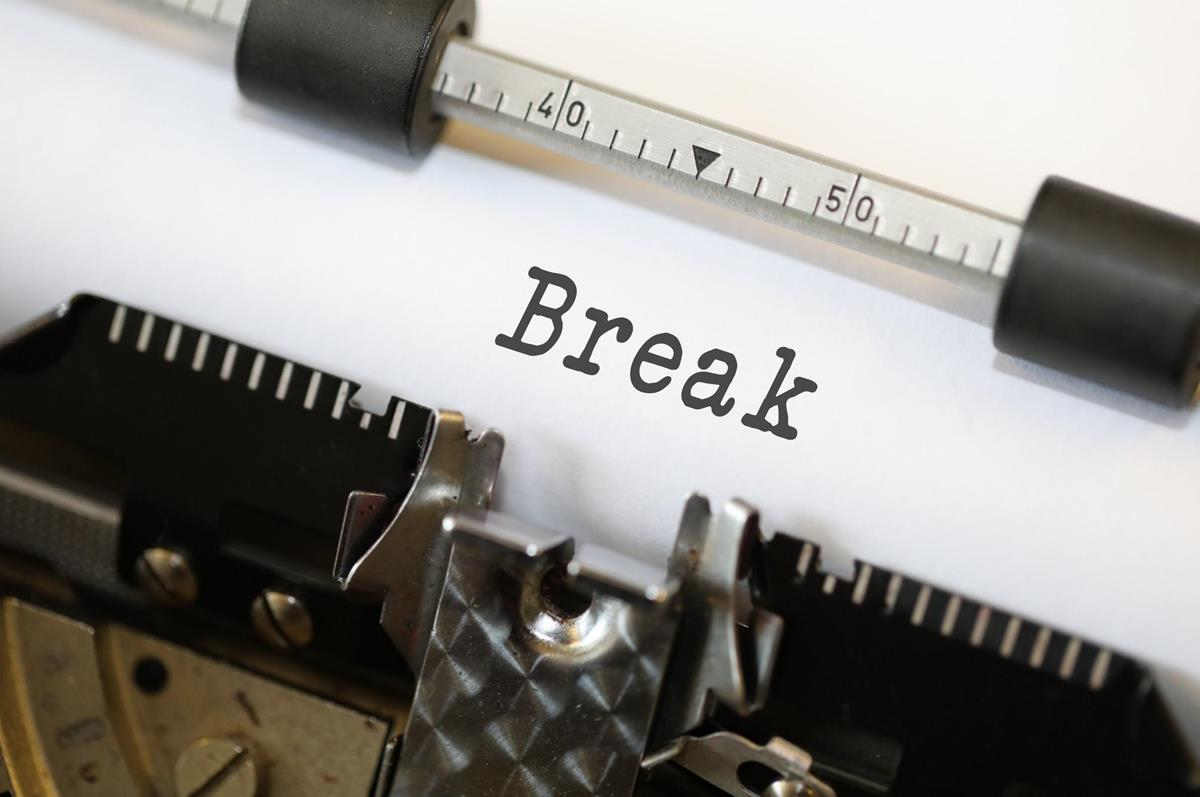

In [ ]:
all_feature.columns

INFO: XGBoost cannot deal with strings...


...nor with date time format


Hence you need to create a data frame which only includes the features we want to inlcude in the model

## Q: How can you achieve this?

In [ ]:
"""Solution: A relatively easy and foolproof way is to define the features we want to include in our model like this
(I also added the shifted features). If you modify this list, you can rerun the models on
a different set of labels without needing to change anything else below"""

selected_features=[
'station_avg_temp_c',                       
'station_diur_temp_rng_c',                  
'station_max_temp_c',                      
'station_min_temp_c',                       
'station_precip_mm',
'precipitation_amt_mm',
'station_avg_temp_c_1',
'station_avg_temp_c_2', 'station_diur_temp_rng_c_1','station_diur_temp_rng_c_2', 'station_max_temp_c_1',
'station_max_temp_c_2', 'station_min_temp_c_1', 'station_min_temp_c_2','station_precip_mm_1', 'station_precip_mm_2',
'precipitation_amt_mm_1','precipitation_amt_mm_2']    

We then use this to create the new data frame which contains only the required features

In [ ]:
sj_train_features_stripped = sj_train_features[selected_features].copy()
sj_train_features_stripped.head()


In [ ]:
print(sj_train_features.shape)
print(sj_train_features_stripped.shape)
print(sj_train_labels.shape)


## Exercise 5 Create iq_train_features_stripped!

## Here comes the actual model fitting part

We will train two separate models for the two cities

In [ ]:
#we import some additional functions we are going to use 
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error

First, we need to create a training and a "test" set (this is an unfortunate naming convention, as this does not refer to the  test set which we created earlier).

Luckily, there is a function exactly for this in sklearn!

(INFO: This (model) test data is for testing the model's performance on the test data. The previous one is the (unlabeled) test data, from which we are going to make the predictions (the missing labels_test.csv file). We will upload the resulting 'labels_test' file to the competiton's platform as a solution.)

In [ ]:
# Create training and test sets for San Juan
X_train, X_test, y_train, y_test = train_test_split(sj_train_features_stripped,sj_train_labels, test_size=0.3, random_state=42)
#X in our case is sj_train_features_stripped, and y is sj_train_labels

The next step is setting which algorithm you want to use for building the model. You also have the possibility to
set the parameters at this step.

To make it simple, we use sklearn's Gradient Boosting regression function. 

INFO: # You can read about this model and its parameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

(This is not the optimal model for this data, see http://drivendata.co/blog/dengue-benchmark/)

## Homework: Instead of Gradient Boosting, use a NegativeBinomial model for your prediction!

First, we create the regressor! Again, for the sake of simplicity, we use the default settings for now.

In [ ]:
xg_reg_sj = ensemble.GradientBoostingRegressor()

Then you need to fit this model to your dataset in another step:

In [ ]:
xg_reg_sj.fit(X_train, y_train)
#here you can see the deafult settings and the parameters you can customize in this regressor

Now, your model is ready to make some predicitons!

In [ ]:
# Predict the labels of the test set
sj_preds = xg_reg_sj.predict(X_test).astype(int) #these are the predictions for only the randomly splitted (model) test df
sj_preds_vis = xg_reg_sj.predict(sj_train_features_stripped).astype(int) #these are the predictions for all cases in the training feature df

#we need to transform them from float to integers (hence "".astype(int)"" because we did not use a model which would have predicted count data (but it is not realistic to have 1.45 patients)


To evaluate what this model achieved so far, we should calculate the metrics this challenge utilizes: mean absolute error
    
INFO: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error

In [ ]:
# Compute metrics
mean_abs_err =(mean_absolute_error(y_test, sj_preds))
print("mean absolute error: %f" % (mean_abs_err))

Visually,  if plotted against the actual values, this performance looks like this:

In [ ]:

figs, axes = plt.subplots(nrows=2, ncols=1)


# plot sj

sj_preds_vis = pd.Series(data=sj_preds_vis)
sj_preds_vis.plot(ax=axes[0], color='red', label="Predictions")
sj_labels.total_cases.plot(ax=axes[1], color='green', label="Actual")


plt.suptitle("Dengue Predicted Cases vs. Actual Cases in San Juan")
plt.legend()
plt.show()

There is only the most important step left for us, to predict the missing labels_test from the unlabeled test data:

## Exercise 6 & 7: 
Do this lat step for San Juan, then repeat the whole procedure on the Iq data!

In [ ]:
#sanity check to see if the data frames have the correct dimensions
print(iq_train_features.shape)
print(iq_train_features_stripped.shape)
print(iq_train_labels.shape)

In [ ]:
iq_labels.total_cases.head()

In [ ]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
iq_preds_vis = pd.Series(data=iq_preds_vis)
iq_preds_vis.plot(ax=axes[0], color="red", label="Predictions")
iq_labels.total_cases.plot(ax=axes[1], color='green',label="Actual")


plt.suptitle("Dengue Predicted Cases vs. Actual Cases in Iquitos")
plt.legend()
plt.show()

## Q: mean absolute error values are really different for the two cities, what can the reason for this?

Let's create the submission file for the challenge

In [ ]:
submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2]) #this reads in the sample submission file which was provided for us

submission.total_cases = np.concatenate([iq_preds_submission, sj_preds_submission]) #this overwrites the total_cases column with our predictions
submission.to_csv("benchmark_budapestpy.csv") #this writes it to a csv file

Submit your first solution csv file on their site: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/submissions/

Try to improve your score via changing around some things during data preparation, with a different type of regressor, doing some feature engineering...


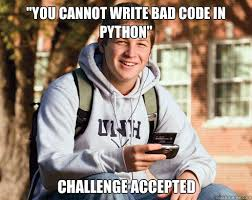